### ASSIGNMENT 5
### Topic - Multi Linear Regression
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

 __Q.1) Prepare a prediction model for profit of 50_startups data.
 Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.__

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isnull().sum()    #NO  null values present

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### *Checking Correlation and linearity*

In [5]:
data.corr()    #Strong relation between profit and R&D ..# Weak relation between profit and administration

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
import seaborn as sns
mask = np.tril(data.corr())   # np.trill shows lower traingle matrix of corr #np.triu will show upper traingle
mask

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.24195525,  1.        ,  0.        ,  0.        ],
       [ 0.72424813, -0.03215388,  1.        ,  0.        ],
       [ 0.97290047,  0.20071657,  0.74776572,  1.        ]])

<AxesSubplot:>

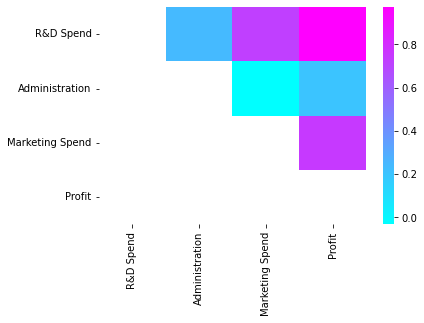

In [7]:
sns.heatmap(data.corr(),fmt = ".1g",cmap="cool",mask=mask)

#Heatmap also indicates strong colinearity between marketing spend and R&D spend

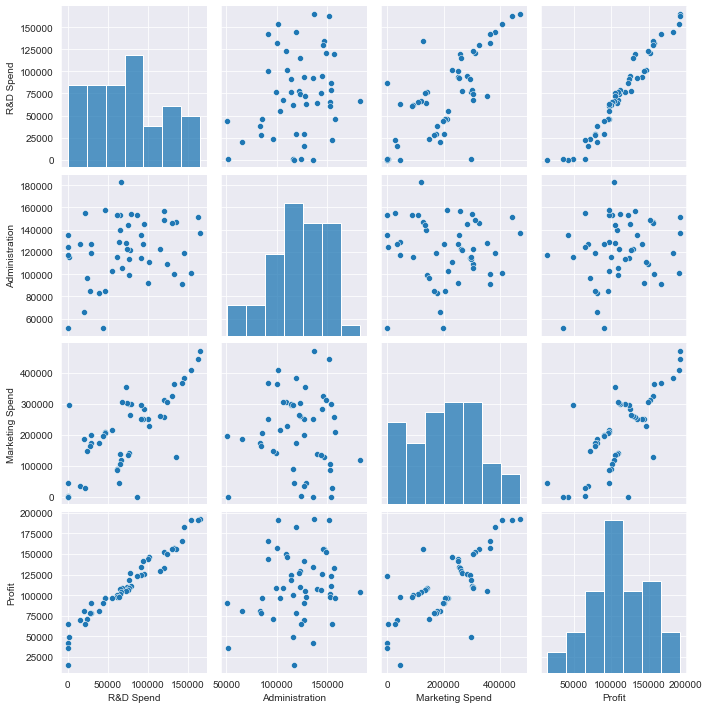

In [8]:
sns.set_style(style="darkgrid")   #Strong linear relation between R&D and profit
sns.pairplot(data);

### *Model*

In [9]:
R = data["R&D Spend"]
M =data["Marketing Spend"]
A = data["Administration"]
P = data["Profit"]

In [10]:
#1 importing necessary library
import statsmodels.formula.api as smf

#2 Creating model object
model = smf.ols("P ~ R+M+A",data=data)

#3 Fitting of model
model = model.fit()

In [11]:
model.params

Intercept    50122.192990
R                0.805715
M                0.027228
A               -0.026816
dtype: float64

### *Hypothesis Test*

__H0 = all parameters are zero (No relation between target and predictors)__

__H1 = atleast one parameter non zero (Definite relation between target and predictors)__

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        20:10:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R              0.8057      0.045     17.846      0.000       0.715       0.897
M              0.0272      0.016      1.655      0.105      -0.006       0.060
A             -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__From Summary as F-statistics>>1 ,Null hypothesis is rejected__

__i.e. there is definite relation between target and predictors__

### *Feature Selection*

In [13]:
def evaluate(model):
    print("t value\n",model.tvalues,"\n")
    print("p value\n",model.pvalues,"\n")
    print("RSS = ",((data.Profit-model.predict())**2).sum())
    print("R_squared = ", model.rsquared)
    print("R_squared adjusted = ",model.rsquared_adj)

In [14]:
model_RD = smf.ols("P~R",data = data).fit()
evaluate(model_RD)

t value
 Intercept    19.320288
R            29.151139
dtype: float64 

p value
 Intercept    2.782697e-24
R            3.500322e-32
dtype: float64 

RSS =  4256046566.3534527
R_squared =  0.9465353160804393
R_squared adjusted =  0.9454214684987817


In [15]:
model_Market = smf.ols("P~M",data = data).fit()
evaluate(model_Market)

t value
 Intercept    7.808356
M            7.802657
dtype: float64 

p value
 Intercept    4.294735e-10
M            4.381073e-10
dtype: float64 

RSS =  35093500559.85731
R_squared =  0.5591535746115515
R_squared adjusted =  0.5499692740826254


In [16]:
model_Admin = smf.ols("P~A",data = data).fit()
evaluate(model_Admin)

t value
 Intercept    3.040044
A            1.419493
dtype: float64 

p value
 Intercept    0.003824
A            0.162217
dtype: float64 

RSS =  76397769887.20715
R_squared =  0.04028714077757223
R_squared adjusted =  0.020293122877105052


__So far best value of 'r suqared adjusted' can be seen for model with only R&D as predictor whereas Administrator gives least value__

__Hence most suitable choice here is use of R&D as predictor__

In [17]:
model_RD_Market = smf.ols("P~R+M",data = data).fit()
evaluate(model_RD_Market)

t value
 Intercept    17.463582
R            19.265555
M             1.927052
dtype: float64 

p value
 Intercept    3.504062e-22
R            6.040433e-24
M            6.003040e-02
dtype: float64 

RSS =  3944394850.3243775
R_squared =  0.9504503015559763
R_squared adjusted =  0.9483418037498477


__Improvement in the model can be seen with increase in adjusted value__

In [18]:
model_RD_Admin = smf.ols("P~R+A",data = data).fit()
evaluate(model_RD_Admin)

t value
 Intercept     9.122352
R            28.588870
A            -1.072677
dtype: float64 

p value
 Intercept    5.695336e-12
R            2.278348e-31
A            2.888932e-01
dtype: float64 

RSS =  4154341662.908167
R_squared =  0.9478129385009173
R_squared adjusted =  0.9455922124796797


__Even though R sq. adjusted is greater for this model, we have seen that Administration as individual doesn't influence Profit that much__

__Most effiecient model so far will be the one with profit as target and R&D Spend,Marketing Spend as predictors__

### *Test for Normality of Residuals (Q-Q Plot)*

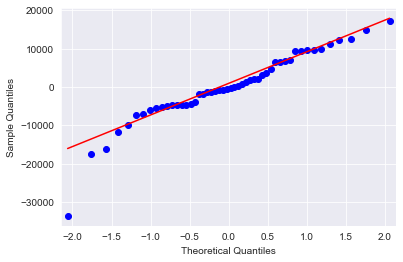

In [19]:
import statsmodels.api as sm
sm.qqplot(model_RD_Market.resid,line="q");

### *Residual Plot for Homoscedasticity*

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

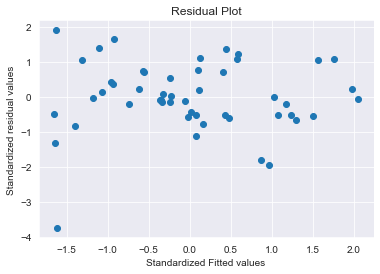

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(get_standardized_values(model_RD_Market.fittedvalues),
            get_standardized_values(model_RD_Market.resid))    #Fitted values means predicted values

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### *Residual vs Regressors*

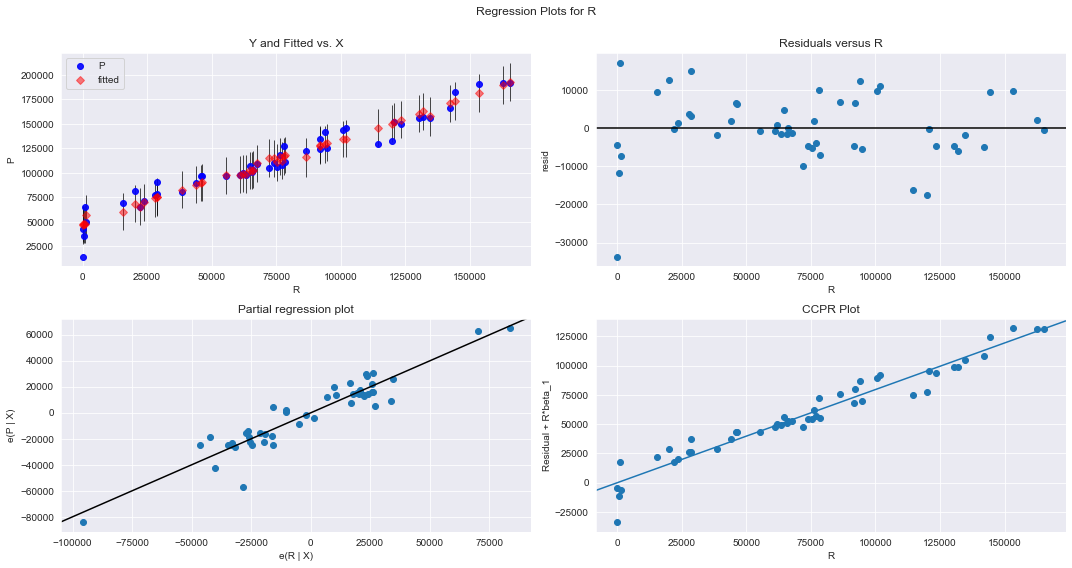

In [22]:
#Regression plots for R&D spend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_RD_Market, "R", fig=fig)
plt.show()

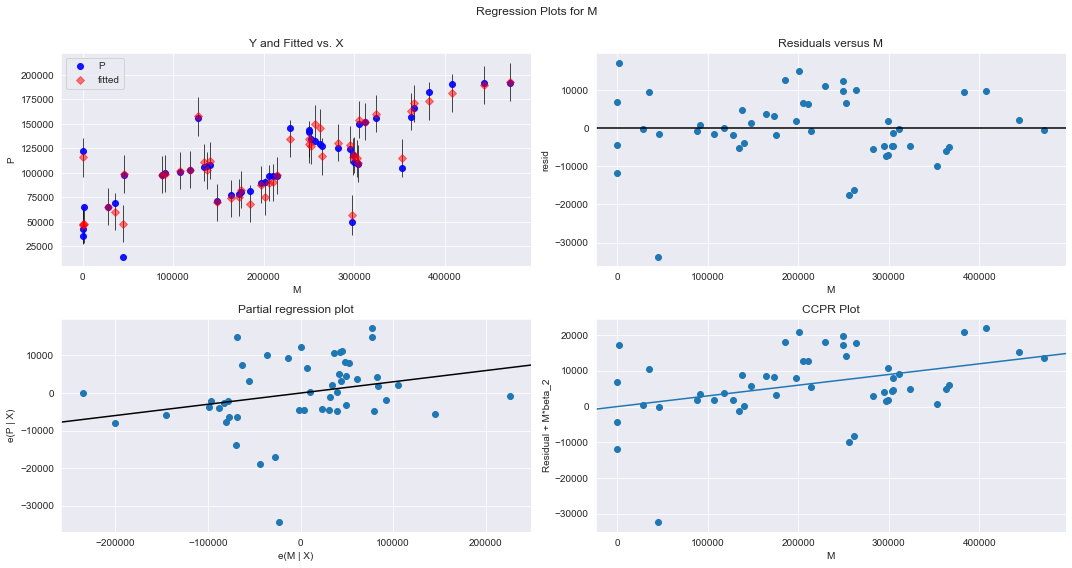

In [23]:
#Regression plots for Marketing Spend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_RD_Market, "M", fig=fig)
plt.show()

### *Model deletion dignostics*

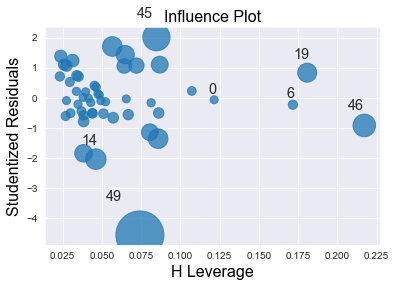

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_RD_Market)
plt.show()

__From above influence plot it is evident that point 45,46,49 are influencers__

In [25]:
data[data.index.isin([45,46,49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
49,0.00,116983.80,45173.06,California,14681.40


In [26]:
data1 = data.copy()

In [27]:
data1 = data1.drop(data1.index[[45,46,49]],axis=0).reset_index()

In [28]:
R = data1["R&D Spend"]
M =data1["Marketing Spend"]
A = data1["Administration"]
P = data1["Profit"]

In [29]:
#Creating new model
model1 = smf.ols("P~R+M",data1).fit()

In [30]:
def evaluate(model):
    print("t value\n",model.tvalues,"\n")
    print("p value\n",model.pvalues,"\n")
    print("RSS = ",((data1.Profit-model.predict())**2).sum())
    print("R_squared = ", model.rsquared)
    print("R_squared adjusted = ",model.rsquared_adj)

In [31]:
evaluate(model1)

t value
 Intercept    20.541807
R            20.152123
M             2.777128
dtype: float64 

p value
 Intercept    3.552018e-24
R            7.621770e-24
M            8.028164e-03
dtype: float64 

RSS =  2392598546.69892
R_squared =  0.9620789282762134
R_squared adjusted =  0.9603552431978595


__Significant improvement in the model can be seen as R_sq adjusted value became 0.96 from 0.94__

In [32]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

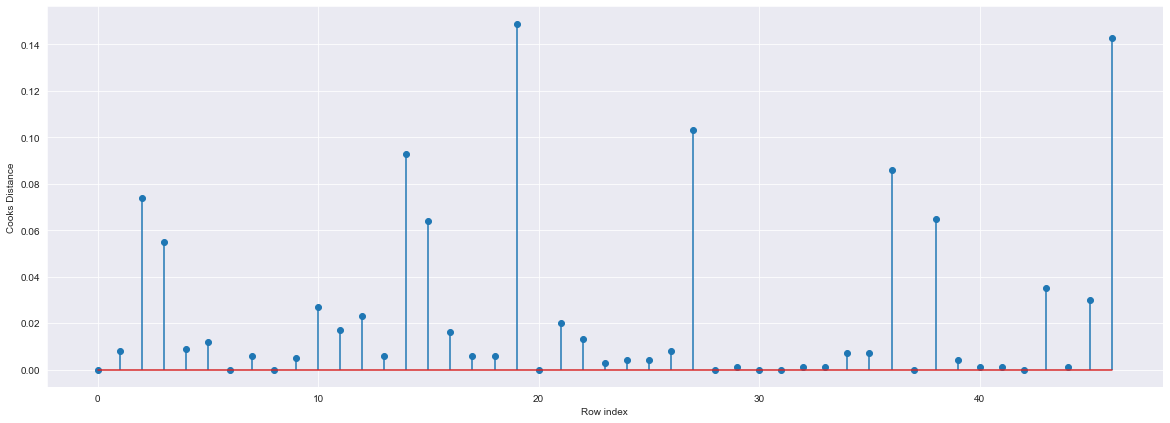

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(19, 0.14945540689515366)

__Since max value < 1 ,we can stop the process and finalize the model__

__model1 is the final model__

### *Predicting for new data*

In [36]:
ndata = pd.DataFrame({'R':135485.56,"A": 104563.25,"M":447968.52,"State":"New York"},index=[1])
ndata

,R,A,M,State
1,135485.56,104563.25,447968.52,New York


In [37]:
print("Predicted profit for given data is",model1.predict(ndata))

Predicted profit for given data is 1    168480.979618
dtype: float64


### *Table of R_squared values*


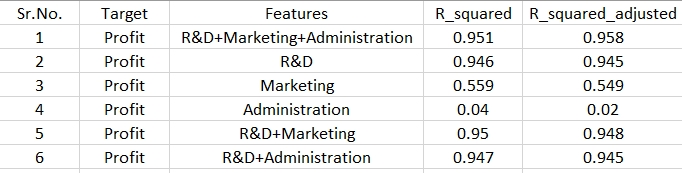

__Q 2) Consider only the below columns and prepare a prediction model for predicting Price.__

__"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"__

In [38]:
import pandas as pd
import numpy as np

In [40]:
toyota = pd.read_csv("ToyotaCorolla.csv",encoding = "unicode_escape") #unicode_escape is used to solve error of utf-8 decode
toyota.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### *Removal of unnecessary columns*

In [41]:
data = toyota.filter(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [42]:
data.isnull().sum()  

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

### *Standardization of data*

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
toyo = scale.fit_transform(data)
toyo

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

### *Creating Target and Predictors and splitting of data for test*

In [44]:
Y = toyo[:,0]
X = toyo[:,1:]
X.shape , Y.shape

((1436, 8), (1436,))

In [45]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
X_train.shape

(1005, 8)

### *Model*

In [46]:
# Creating Model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [47]:
# Prediction on test data
lreg.predict(X_test)

array([-6.93086091e-01, -8.94577631e-02,  6.04006643e-01, -8.35732982e-01,
       -7.55904748e-02, -3.19266444e-01, -1.24410623e+00,  1.54190886e+00,
        1.51247873e-01, -1.04121458e-01, -1.05279313e+00,  1.09042218e-01,
        2.80279006e-01, -2.72884251e-01, -9.16491163e-01,  1.51125642e+00,
        1.03673207e-01, -8.20445552e-01,  5.52869724e-01, -5.52749644e-01,
       -1.11069475e+00, -1.27956569e+00,  2.45606506e-01,  4.85339885e-01,
        2.29186334e+00, -8.09902581e-01,  8.91697406e-01, -1.38602718e+00,
       -4.14908908e-01, -7.91437560e-01, -1.27977270e-02, -8.33623857e-01,
        1.48881126e+00, -9.73339379e-01,  9.70782823e-02,  5.53371942e-01,
       -2.43748694e-01,  3.86517120e-01, -2.34265522e-01, -4.77735084e-01,
       -5.53264922e-01, -4.95289637e-02, -2.18639906e-01,  1.77663558e+00,
        4.40680502e-02, -1.00748108e+00, -3.30914291e-01, -8.75384986e-01,
       -6.19283531e-01, -5.47078127e-01,  2.36897214e+00, -6.53563648e-01,
       -9.96816711e-01, -

In [48]:
lreg.score(X_test,Y_test)  #Checking accuracy

0.6550065853643857

In [49]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

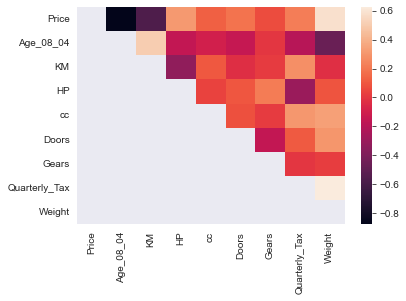

In [50]:
import seaborn as sns
mask = np.tril(data.corr())
sns.heatmap(data.corr(),fmt = ".1g",cmap=None,mask=mask)

__Price has comparatively strong relation with Age,KM and Weight__ 

__Hence assuming minimum features to be 3__

### *Backward Feature Elimination*

In [51]:
!pip install mlxtend


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring= "neg_mean_squared_error")
sfs1.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=4, scoring='neg_mean_squared_error',
                          verbose=1)

In [53]:
sfs1.k_feature_names_

('0', '1', '2', '7')

In [54]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

### *Improvization in model with help of feature engineering*

In [55]:
Y = toyo[:,0]
X = toyo[:,[1,2,8]]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

model1= lreg.fit(X_train,Y_train)

lreg.score(X_test,Y_test)

0.7790832801768225

__By taking suggested columns from SequentialFeatureSelector we impoved over score by +10%__

__But from correlation we saw that Weight also has good correlation with target,using weight increased accuracy of model__
